In [1]:
import requests, pickle
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
import tensorflow.keras.optimizers as optimizers
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from keras.src.layers import Dropout
from keras.src.regularizers import regularizers

### Carga de datos

In [2]:
url = 'https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl'
r = requests.get(url, allow_redirects=True)
open('./mnist1d_data.pkl', 'wb').write(r.content)

with open('./mnist1d_data.pkl', 'rb') as handle:
    data = pickle.load(handle)
    
data.keys()

dict_keys(['x', 'x_test', 'y', 'y_test', 't', 'templates'])

### Desempaquetado y normalización de los datos
MinMaxScaler de sklearn y OneHot encoder de autoría propia

In [3]:
import mios
x = data["x"]
x_test = data["x_test"]
y = data["y"]
y_test = data["y_test"]
y = mios.OneHot(y)
y_test = mios.OneHot(y_test)

scaler = MinMaxScaler()
scaler.fit(x)
scaler.transform(x)
scaler.transform(x_test)
print()

### Declaración de la red neuronal

In [5]:
DNN2 = Sequential()
DNN2.add(Input(shape=(40,)))
DNN2.add(Dense(100, activation='relu'))
DNN2.add(Dense(100, activation='relu'))
DNN2.add(Dense(100, activation='relu'))
DNN2.add(Dense(10, activation='softmax'))

adam = optimizers.Adam(0.001)

DNN2.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=adam,
              metrics=['accuracy'])

DNN2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,310 (98.87 KB)

 Trainable params: 25,310 (98.87 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [6]:
H = DNN2.fit(x, y, epochs=1000, validation_data=[x_test, y_test])

Epoch 1/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2001 - loss: 2.1029 - val_accuracy: 0.3410 - val_loss: 1.6852
Epoch 2/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3601 - loss: 1.5981 - val_accuracy: 0.4490 - val_loss: 1.4570
Epoch 3/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4797 - loss: 1.3558 - val_accuracy: 0.4750 - val_loss: 1.3346
Epoch 4/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5437 - loss: 1.2138 - val_accuracy: 0.4890 - val_loss: 1.2711
Epoch 5/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6105 - loss: 1.0697 - val_accuracy: 0.5080 - val_loss: 1.2361
Epoch 6/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6297 - loss: 1.0019 - val_accuracy: 0.5410 - val_loss: 1.1733
Epoch 7/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - loss: 0.8947 - val_accuracy: 0.5400 - val_loss: 1.1395
Epoch 8/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6904 - loss: 0.8440 - 

### Graficación de comportamiento

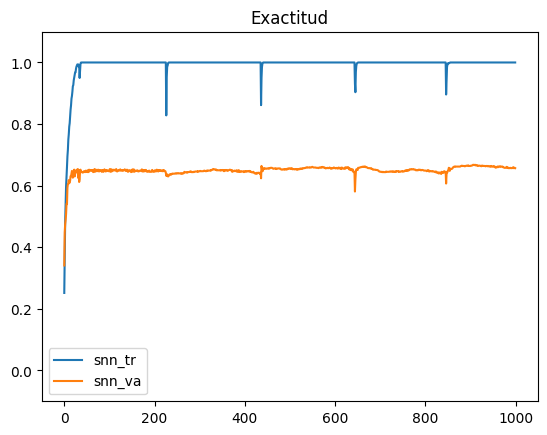

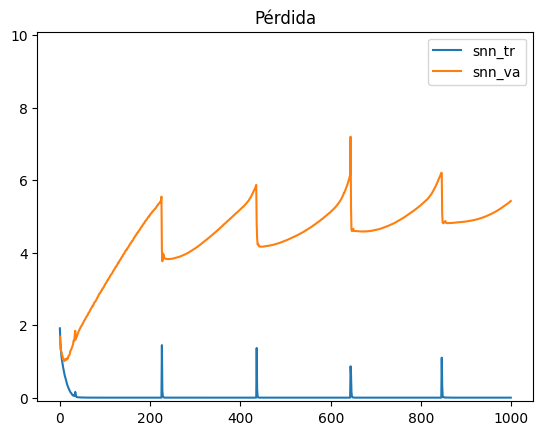

In [7]:
pyplot.title("Exactitud")
pyplot.plot(H.history['accuracy'], label='snn_tr')
pyplot.plot(H.history['val_accuracy'], label='snn_va')
pyplot.ylim(-0.1,1.1)
pyplot.legend()
pyplot.show()

pyplot.title("Pérdida")
pyplot.plot(H.history['loss'], label='snn_tr')
pyplot.plot(H.history['val_loss'], label='snn_va')
pyplot.ylim(-0.1,10.1)
pyplot.legend()
pyplot.show()

## Propuesta de mejora
Cambiar

In [4]:
DNN2_p = Sequential()
DNN2_p.add(Input(shape=(40,)))
DNN2_p.add(Dropout(0.2, input_shape=(40,)))
DNN2_p.add(Dense(100,activation='relu', activity_regularizer=regularizers.L2(0.00001)))
DNN2_p.add(Dense(100,activation='relu', activity_regularizer=regularizers.L2(0.00001)))
DNN2_p.add(Dense(100,activation='relu', activity_regularizer=regularizers.L2(0.00001)))
DNN2_p.add(Dense(10, activation='softmax'))

callbacks = [keras.callbacks.EarlyStopping(patience=200)]

# opti = optimizers.Adam(0.001)
opti = optimizers.SGD(learning_rate=0.05, momentum=0.01)

DNN2_p.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=opti,
              metrics=['accuracy'])

H_p = DNN2_p.fit(x, y, epochs=1000, validation_data=[x_test, y_test], callbacks=callbacks)
#, callbacks=callbacks

C:\Users\Milo\venv\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1686 - loss: 2.2348 - val_accuracy: 0.2460 - val_loss: 1.8526
Epoch 2/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2764 - loss: 1.8342 - val_accuracy: 0.3110 - val_loss: 1.7256
Epoch 3/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3183 - loss: 1.7648 - val_accuracy: 0.3420 - val_loss: 1.6614
Epoch 4/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3437 - loss: 1.6761 - val_accuracy: 0.3530 - val_loss: 1.5890
Epoch 5/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3776 - loss: 1.6319 - val_accuracy: 0.3960 - val_loss: 1.4988
Epoch 6/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3925 - loss: 1.5692 - val_accuracy: 0.4190 - val_loss: 1.4776
Epoch 7/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4102 - loss: 1.5326 - val_accuracy: 0.4700 - val_loss: 1.3993
Epoch 8/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4153 - loss: 1.5072 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,622 (197.75 KB)

 Trainable params: 25,310 (98.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,312 (98.88 KB)

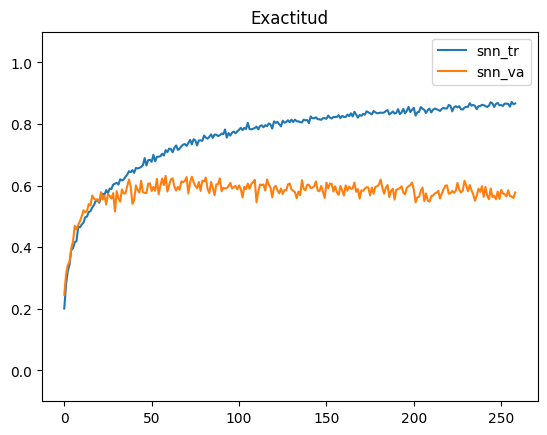

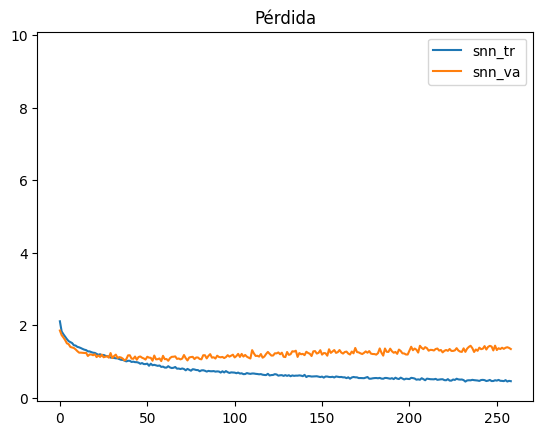

In [5]:
DNN2_p.summary()

pyplot.title("Exactitud")
pyplot.plot(H_p.history['accuracy'], label='snn_tr')
pyplot.plot(H_p.history['val_accuracy'], label='snn_va')
pyplot.ylim(-0.1,1.1)
pyplot.legend()
pyplot.show()

pyplot.title("Pérdida")
pyplot.plot(H_p.history['loss'], label='snn_tr')
pyplot.plot(H_p.history['val_loss'], label='snn_va')
pyplot.ylim(-0.1,10.1)
pyplot.legend()
pyplot.show()